### Housing Prices Analysis

The housing market is a fascinating reflection of economic trends, societal shifts, and individual preferences. By analyzing housing prices, we can uncover insights into what drives property values and potentially predict future trends. This notebook dives into a dataset of housing prices to explore these dynamics. If you find this analysis useful, please consider upvoting it.


In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
file_path = '/kaggle/input/housing-prices-dataset/Housing.csv'
df = pd.read_csv(file_path)

### Initial Data Exploration

Let's take a first look at the dataset to understand its structure and contents.

In [4]:
# Display the first few rows of the dataset
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Cleaning and Preparation

Before diving into analysis, we need to ensure the data is clean and ready for use. This includes checking for missing values and converting categorical variables into numerical ones.

In [5]:
# Check for missing values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# Convert categorical variables to numerical
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

### Correlation Analysis

Understanding the correlation between different variables can provide insights into what factors most influence housing prices.

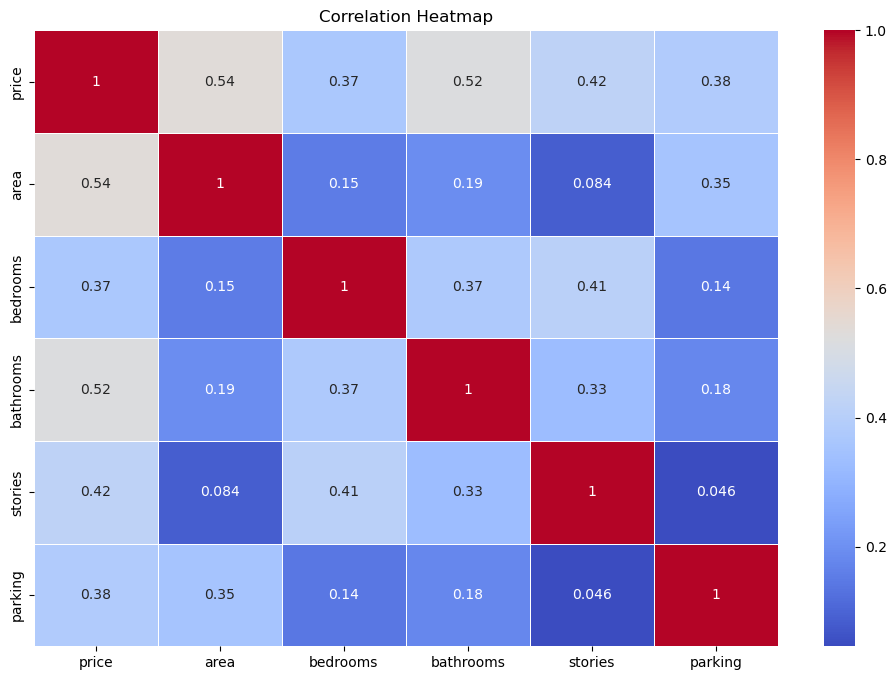

In [7]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Predictive Modeling

Given the data, it seems plausible to predict housing prices based on the other features. Let's build a linear regression model to see how well we can predict the prices.

In [8]:
# Define the target variable and features
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the prediction accuracy
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1523019469501.2913, 0.6463350878895877)

In [10]:
X_test

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
316,5900,4,2,2,1,False,False,True,False,False,False,False,True
77,6500,3,2,3,0,True,False,False,False,True,True,False,False
360,4040,2,1,1,0,True,False,False,False,False,False,True,False
90,5000,3,1,2,0,True,False,False,False,True,False,True,False
493,3960,3,1,1,0,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,3600,6,1,2,1,True,False,False,False,False,False,False,True
425,3185,2,1,1,2,True,False,True,False,False,False,False,False
195,4410,4,3,2,2,True,False,True,False,False,False,True,False
452,9000,3,1,2,2,True,False,False,False,False,False,True,False


### Conclusion and Future Work

In this notebook, we explored the housing prices dataset, performed data cleaning, and built a predictive model for housing prices. The correlation analysis provided insights into the relationships between different variables, and the linear regression model gave us a way to predict housing prices.

For future analysis, it would be interesting to explore more sophisticated models, such as decision trees or random forests, to see if they can improve prediction accuracy. Additionally, incorporating external data, such as economic indicators or neighborhood crime rates, could provide a more comprehensive understanding of housing prices.

What other analyses do you think would be useful? Feel free to share your thoughts.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)